In [1]:
import os
import time
import random

import pandas as pd
import numpy as np
import cv2
from skimage import io, transform
from PIL import Image
import matplotlib.pyplot as plt

import torch
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils, models
import torch.nn as nn
from torchsummary import summary

os.chdir('..')
from src import Datasets, models, loss, util_tools

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print("Pytorch Version   : ", torch.__version__)
print("Is GPU being used : ", torch.cuda.is_available())

Pytorch Version   :  1.7.1
Is GPU being used :  True


In [2]:
# spliting the dataset
# For now, we are validating on images ending with "9.png"
print(os.getcwd())
dataset = os.listdir(os.path.join(os.getcwd(), r'data\raw\comma10k\images'))
train_set, val_set = [], []

for file_name in dataset:
    if int(file_name.split('.')[0][-1]) == 9:
        val_set.append(file_name)
    else:
        train_set.append(file_name)

print("Number of Training Images   : ", len(train_set))
print("Number of Validation Images : ", len(val_set))

c:\Users\ragha\Desktop\Projects\Semantic-Segmentation-for-Autonomous-Driving
Number of Training Images   :  87
Number of Validation Images :  13


In [3]:
from src import Datasets, models, loss
my_transforms_train = transforms.Compose([
                                           #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
                                           transforms.Resize((768, 1280)),
                                           transforms.ToTensor()
    ])
my_transforms_val = transforms.Compose([
                                           #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
                                           #transforms.ToTensor()
    ])

#new_height = int(self.new_width * image.shape[0] / image.shape[1])
train_dataset = Datasets.Comma10k(train_set, os.path.join(os.getcwd(), r'data\raw\comma10k'), transform=my_transforms_train)
train_dataloader = DataLoader(train_dataset, batch_size=1, shuffle=True, num_workers=0, drop_last=True)

0 torch.Size([1, 3, 768, 1280]) torch.Size([1, 3, 768, 1280])
1 torch.Size([1, 3, 768, 1280]) torch.Size([1, 3, 768, 1280])
2 torch.Size([1, 3, 768, 1280]) torch.Size([1, 3, 768, 1280])
3 torch.Size([1, 3, 768, 1280]) torch.Size([1, 3, 768, 1280])


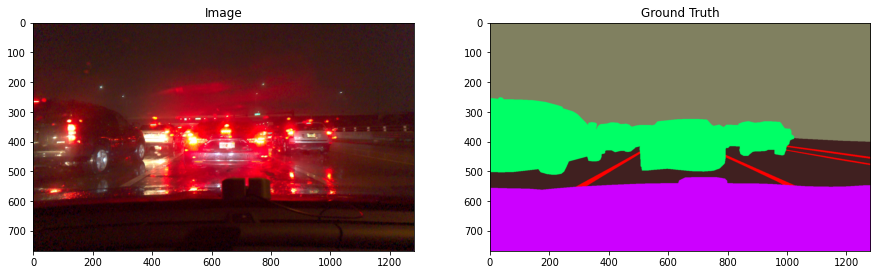

In [4]:
for i_batch, sample_batched in enumerate(train_dataloader):
    print(i_batch, sample_batched['image'].size(),
          sample_batched['gt_mask'].size())

    # observe 4th batch and stop.
    if i_batch == 3:
        for idx in range(len(sample_batched['image'])):
            util_tools.show_imgs(sample_batched['image'][idx], sample_batched['gt_mask'][idx])
        break

In [10]:
model = models.ResNetUNet(n_class=5)
model = model.to('cuda')

# check keras-like model summary using torchsummary

summary(model, input_size=(3, 768, 1280))

RuntimeError: CUDA out of memory. Tried to allocate 960.00 MiB (GPU 0; 4.00 GiB total capacity; 6.05 GiB already allocated; 0 bytes free; 6.43 GiB reserved in total by PyTorch)

In [8]:
pred = model(sample_batched['image'].cuda())
print(pred[0].shape)

torch.Size([5, 768, 1280])


In [9]:
sample_batched['image'].cuda().shape

torch.Size([1, 3, 768, 1280])